# An Empirical Comparison of Supervised and Self-Supervised Learning

In [31]:
import tqdm
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from sklearn.svm import SVC
from sklearn.manifold import TSNE

from train import train_encoder, train_ConvNet, TrainArgs
from test import encode_data, plot_tsne, test_conv

from torch.utils.data import Subset

In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Baseline: convolutional neural network

In [33]:
conv_args = TrainArgs(batchsize = 10)

In [34]:
ConvNet, conv_losses = train_ConvNet(conv_args)

Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.302
[epoch: 0, i:   999] avg mini-batch loss: 2.300
[epoch: 0, i:  1499] avg mini-batch loss: 2.295
[epoch: 0, i:  1999] avg mini-batch loss: 2.283
[epoch: 0, i:  2499] avg mini-batch loss: 2.243
[epoch: 0, i:  2999] avg mini-batch loss: 2.179
[epoch: 0, i:  3499] avg mini-batch loss: 2.050
[epoch: 0, i:  3999] avg mini-batch loss: 1.959
[epoch: 0, i:  4499] avg mini-batch loss: 1.926
[epoch: 0, i:  4999] avg mini-batch loss: 1.873
[epoch: 1, i:   499] avg mini-batch loss: 1.807
[epoch: 1, i:   999] avg mini-batch loss: 1.800
[epoch: 1, i:  1499] avg mini-batch loss: 1.764
[epoch: 1, i:  1999] avg mini-batch loss: 1.773
[epoch: 1, i:  2499] avg mini-batch loss: 1.718
[epoch: 1, i:  2999] avg mini-batch loss: 1.697
[epoch: 1, i:  3499] avg mini-batch loss: 1.685
[epoch: 1, i:  3999] avg mini-batch loss: 1.670
[epoch: 1, i:  4499] avg mini-batch loss: 1.653
[epoch: 1, i:  4999] avg mini-batc

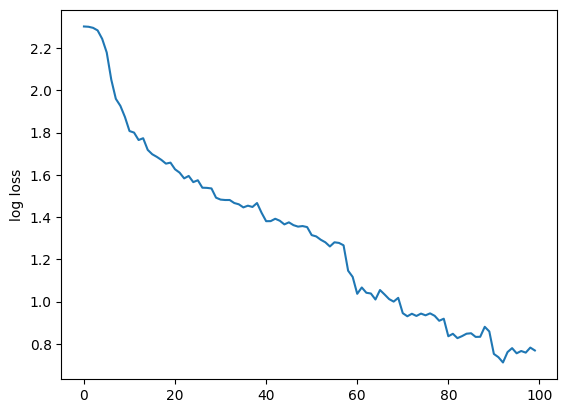

In [35]:
plt.plot(conv_losses);
plt.ylabel('log loss');

In [36]:
print(f'Baseline accuracy of the convolutional model is {test_conv(ConvNet)*100} %')

Files already downloaded and verified
Baseline accuracy of the convolutional model is 65.72 %


## Momentum Contrast

### Pre-Training the Encoder

In [37]:
encoder_args = TrainArgs(epochs = 40)

In [38]:
encoder, enc_losses = train_encoder(encoder_args)

Files already downloaded and verified
Files already downloaded and verified
Train Epoch: 1 	Loss: 0.060501
Train Epoch: 2 	Loss: 0.047579
Train Epoch: 3 	Loss: 0.036043
Train Epoch: 4 	Loss: 0.028056
Train Epoch: 5 	Loss: 0.022401
Train Epoch: 6 	Loss: 0.017858
Train Epoch: 7 	Loss: 0.014522
Train Epoch: 8 	Loss: 0.012371
Train Epoch: 9 	Loss: 0.010768
Train Epoch: 10 	Loss: 0.009612
Train Epoch: 11 	Loss: 0.008653
Train Epoch: 12 	Loss: 0.007836
Train Epoch: 13 	Loss: 0.007041
Train Epoch: 14 	Loss: 0.006315
Train Epoch: 15 	Loss: 0.005719
Train Epoch: 16 	Loss: 0.005087
Train Epoch: 17 	Loss: 0.004681
Train Epoch: 18 	Loss: 0.004298
Train Epoch: 19 	Loss: 0.004009
Train Epoch: 20 	Loss: 0.003759
Train Epoch: 21 	Loss: 0.003588
Train Epoch: 22 	Loss: 0.003414
Train Epoch: 23 	Loss: 0.003262
Train Epoch: 24 	Loss: 0.003106
Train Epoch: 25 	Loss: 0.002953
Train Epoch: 26 	Loss: 0.002827
Train Epoch: 27 	Loss: 0.002699
Train Epoch: 28 	Loss: 0.002577
Train Epoch: 29 	Loss: 0.002463
Train

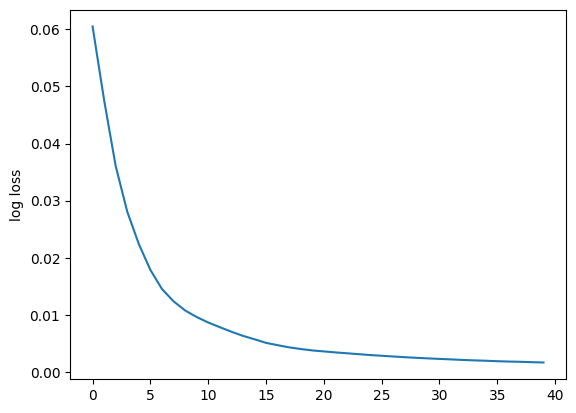

In [39]:
plt.plot(enc_losses);
plt.ylabel('log loss');

### Visualizing Embeddings

To do:
1. Implement multiple training ratios
2. Hyperparameter tuning?
3. Plot the loss functions

In [40]:
data, targets = encode_data()

Files already downloaded and verified


100%|██████████| 10000/10000 [02:01<00:00, 82.29it/s]


In [41]:
ret = TSNE(n_components=2, random_state=0, n_jobs=8).fit_transform(data)

Files already downloaded and verified


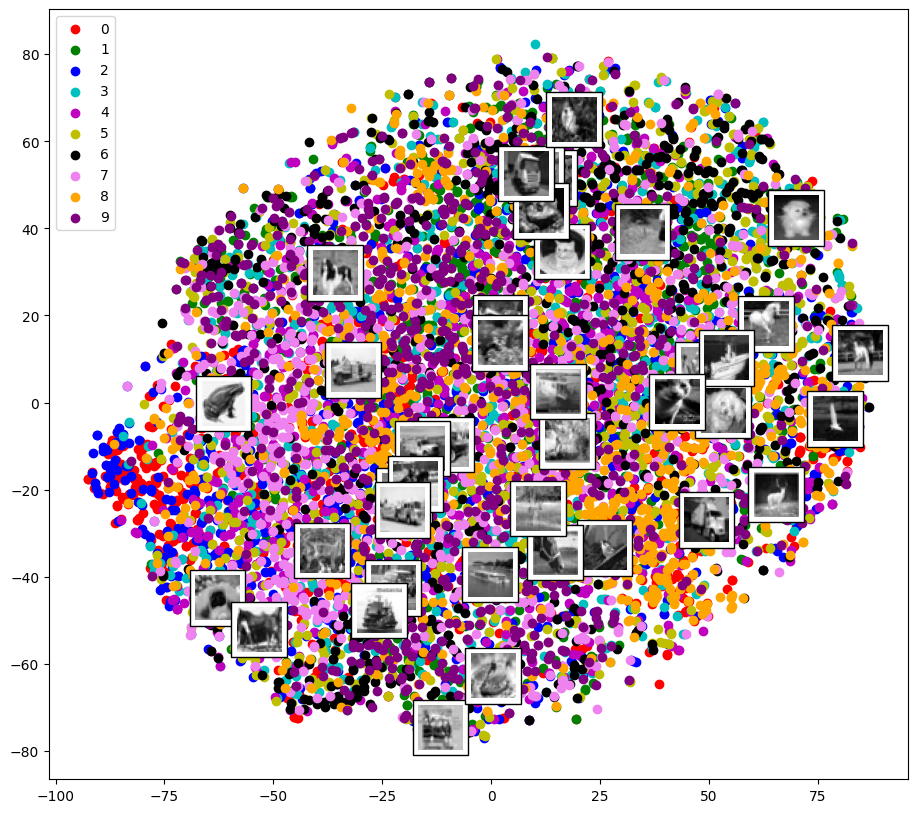

In [42]:
plot_tsne(targets, ret)

### Training SVM on freezed features

In [43]:
X_train, y_train = encode_data(train=True)
X_test, y_test = encode_data(train=False)

Files already downloaded and verified


100%|██████████| 50000/50000 [09:42<00:00, 85.82it/s]


Files already downloaded and verified


100%|██████████| 10000/10000 [01:57<00:00, 85.32it/s]


In [44]:
svm = SVC(C = 100,  gamma='scale')
svm.fit(X_train, y_train)

SVC(C=100)

In [45]:
svm.score(X_test, y_test)

0.475

### Multiple Runs

In [46]:
# subsample so things run faster
X_train, y_train = encode_data(train=True, subsample = True)
X_test, y_test = encode_data(train=False, subsample = True)

Files already downloaded and verified


100%|██████████| 5000/5000 [00:59<00:00, 83.60it/s]


Files already downloaded and verified


100%|██████████| 1000/1000 [00:11<00:00, 84.36it/s]


In [47]:
conv_args = TrainArgs(batchsize = 10, epochs = 5)

In [48]:
n = 3
conv_errors = []
svm_errors = []
for i in range(n):
    ConvNet, conv_losses = train_ConvNet(conv_args, subsample=True)
    conv_errors.append(test_conv(ConvNet, subsample=True)*100)
    
    svm = SVC(C = 100,  gamma='scale')
    svm.fit(X_train, y_train)   
    svm_errors.append(svm.score(X_test, y_test))

Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.303
[epoch: 1, i:   499] avg mini-batch loss: 2.301
[epoch: 2, i:   499] avg mini-batch loss: 2.298
[epoch: 3, i:   499] avg mini-batch loss: 2.288
[epoch: 4, i:   499] avg mini-batch loss: 2.255
Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.301
[epoch: 1, i:   499] avg mini-batch loss: 2.289
[epoch: 2, i:   499] avg mini-batch loss: 2.251
[epoch: 3, i:   499] avg mini-batch loss: 2.124
[epoch: 4, i:   499] avg mini-batch loss: 2.030
Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.300
[epoch: 1, i:   499] avg mini-batch loss: 2.287
[epoch: 2, i:   499] avg mini-batch loss: 2.215
[epoch: 3, i:   499] avg mini-batch loss: 2.129
[epoch: 4, i:   499] avg mini-batch loss: 2.033
Files already downloaded and verified


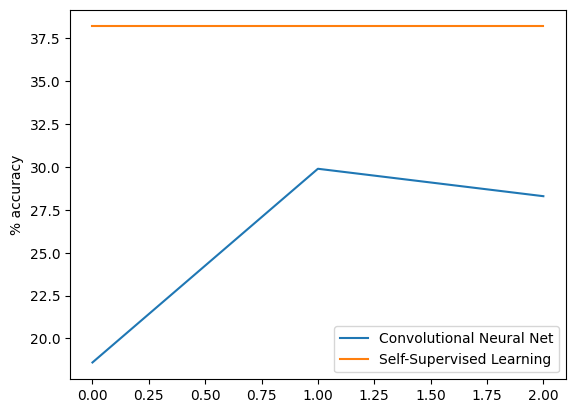

In [49]:
plt.plot(np.array(conv_errors), label="Convolutional Neural Net")
plt.plot(np.array(svm_errors)*100, label="Self-Supervised Learning")
plt.legend()
plt.ylabel('% accuracy')
plt.savefig('./results/comparison.png')

In [50]:
conv_errors

[18.6, 29.9, 28.299999999999997]

In [51]:
svm_errors

[0.382, 0.382, 0.382]

In [52]:
conv_errors

[18.6, 29.9, 28.299999999999997]